#### Importing necessary libs

In [242]:
import pandas as pd
import numpy as np
import seaborn as sna
import missingno as msno #a Python library designed to visualize and analyze missing data in datasets

#### Reading CSV

In [243]:
df=pd.read_csv('googleplaystore.csv')
df.shape

(10841, 13)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Data Cleaning 

#### 1. Which of the following column/s has/have null values

<Axes: >

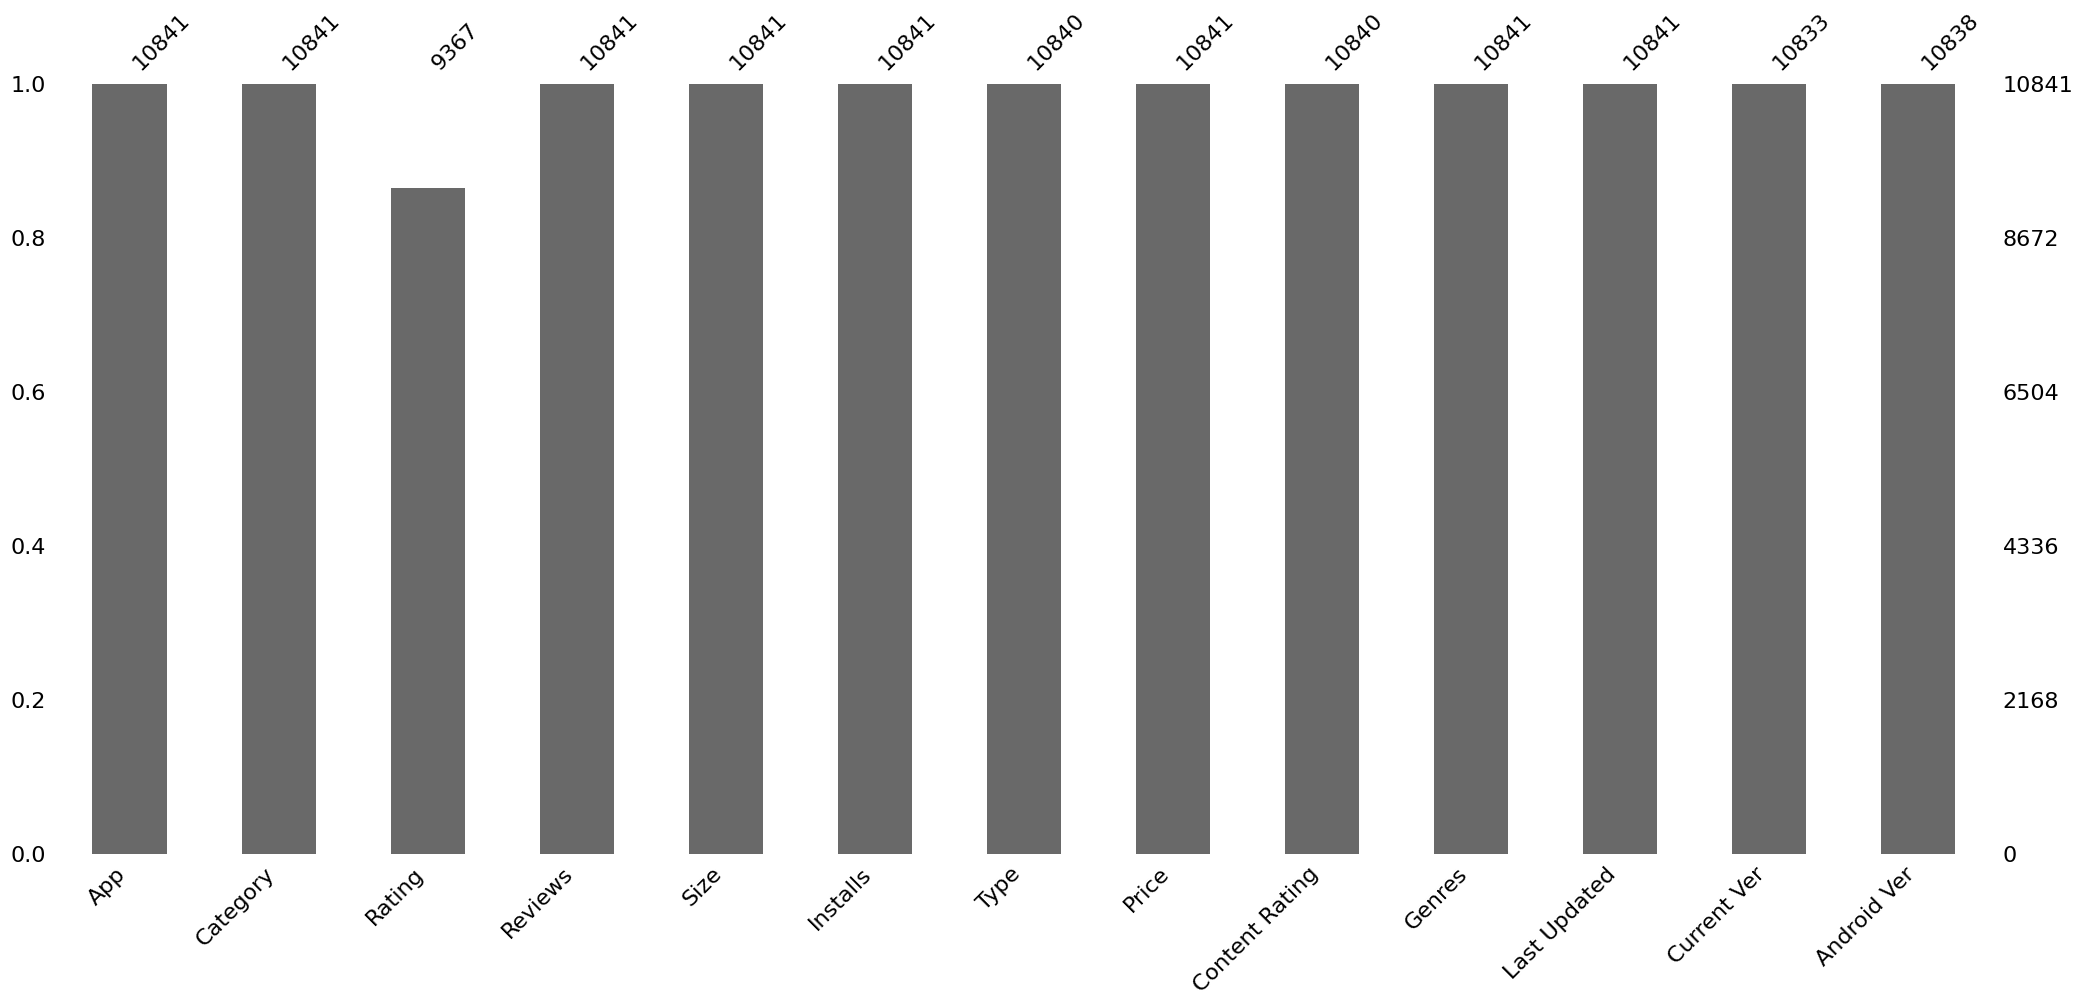

In [245]:
msno.bar(df)

In [246]:
df.isna().sum().sort_values(ascending=False) #is not assigned ka sum
#answer is Rating            1474
# Current Ver          8
# Android Ver          3
# Content Rating       1
# Type                 1
 

Rating            1474
Current Ver          8
Android Ver          3
Content Rating       1
Type                 1
Size                 0
Reviews              0
Category             0
App                  0
Price                0
Installs             0
Last Updated         0
Genres               0
dtype: int64

### Clean the Rating column and the other columns containing null values
- Remove the invalid values from Rating(if any). Just set them as NaN
- Fill the null values in the Rating column using the mean()
- Clean any other non numerical value by jsut dropping the values

<Axes: >

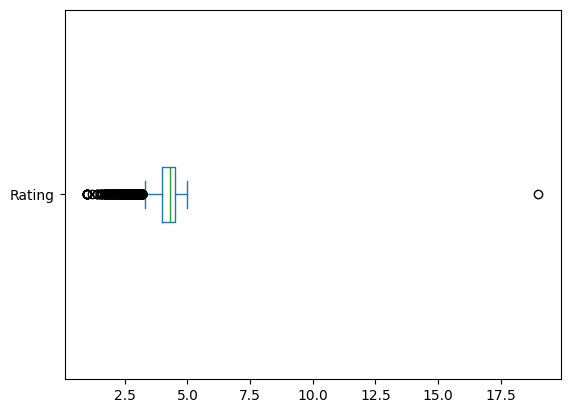

In [247]:
df['Rating'].plot(kind='box',vert=False)

In [248]:
df.loc[(df['Rating']>5)|(df['Rating']<0) ]
#here we have only one invalid rating
#df['Rating'].describe()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


<Axes: >

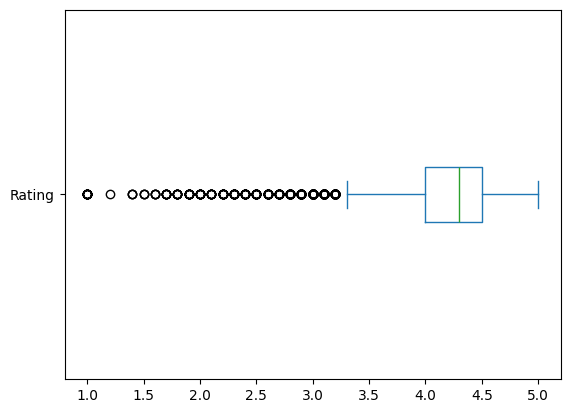

In [249]:
#changing invalid rating to nan
df.loc[(df['Rating']>5)|(df['Rating']<0) ]=np.nan
df['Rating'].plot(kind='box',vert=False)


In [250]:
#changing nan values to mean
df.loc[(df['Rating'].isna())]
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df['Rating'].describe()

count    10841.000000
mean         4.191757
std          0.478885
min          1.000000
25%          4.100000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

In [251]:
#dropping columns with na values
df.dropna(inplace=True)
df.isna().sum().sort_values(ascending=False)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Clean the column "REview" to make it numeric

In [252]:
df.loc[df['Reviews'].isna()]
df['Reviews'].sample(10)

7325         6
8818      1576
1091       283
6717    138337
9578      3175
7221         0
2273        10
3317     56848
7931     28136
2500       163
Name: Reviews, dtype: object

In [253]:
df['Reviews Numeric']=pd.to_numeric(df['Reviews'],errors='coerce') #to handle any errors 
df.sample(10)
df.loc[~df['Reviews Numeric'].isna()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews Numeric
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,159
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,967
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,87510
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,215644
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,967


In [ ]:
#deleting a column
#del df['Reviews Numeric']
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Suppose in the dataset we had some reviews which were written like 1M or 6.4M for that we will change it follow the following steps

In [255]:
df.loc[df['Reviews'].str.contains('M'), 'Reviews'] #checking whether it contains M or not 
df.loc[df['Reviews'].str.contains('M'), 'Reviews'].str.replace('M','')

Series([], Name: Reviews, dtype: object)

In [256]:
(pd.to_numeric(df.loc[df['Reviews'].str.contains('M'), 'Reviews'].str.replace('M',''))*1_000_000).astype(str) #So here we select the reviews containing M replace M with a ' ' then multiply the number with 1000000 to get million and changing the type to str for ease in future

Series([], Name: Reviews, dtype: object)

In [257]:
#assigning it to the df
df.loc[df['Reviews'].str.contains('M'), 'Reviews'] =(pd.to_numeric(df.loc[df['Reviews'].str.contains('M'), 'Reviews'].str.replace('M',''))*1_000_000).astype(str) 

In [258]:
#Now we will convert the whole thing to nmber
df['Reviews']=pd.to_numeric(df['Reviews'])

### How many duplicated apps are there?

In [259]:
df.loc[df.duplicated(subset=['App'])].sort_values(by='App',ascending=False).shape #subset=['App'] is used to see the app duplicates

(1181, 13)

This is like 
Fb
Fb X
Fb X

the first one is original others are duplicate 
but we want all of it
Fb X
Fb X
Fb X

In [260]:
df.loc[df.duplicated(subset=['App'],keep=False)].sort_values(by='App',ascending=False).shape
#or
# df.loc[df.duplicated(subset=['App'],keep=False) & ~df.duplicated(keep=False)].sort_values(by=['App'])

# So here we have total 1979 duplicates

(1979, 13)

### Drop duplicated apps keeping only the ones with the greatest number of reviews


In [261]:
dfCopy=df.copy()


In [262]:
df=dfCopy


In [263]:
#we wanna drop older data by review since we see it was sraped
df.sort_values(['App','Reviews'],inplace=True)
df.drop_duplicates(subset='App',keep='last',inplace=True)
df.describe()

,Rating,Reviews
count,9648.000000,9.648000e+03
mean,4.176128,2.170487e+05
std,0.494176,1.832460e+06
min,1.000000,0.000000e+00
25%,4.000000,2.500000e+01
50%,4.200000,9.745000e+02
75%,4.500000,2.949750e+04
max,5.000000,7.815831e+07


### Format the category column
Categories are all uppercase and are separated by underscores. Format it to ART_AND_DESIGN => Art and design

In [264]:
df["Category"].value_counts()

Category
FAMILY                 1874
GAME                    945
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PRODUCTIVITY            374
PERSONALIZATION         374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               105
ENTERTAINMENT            86
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
PARENTING                60
ART_AND_DESIGN           60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

In [265]:
df['Category']=df['Category'].str.replace('_',' ')
df['Category']=df['Category'].str.capitalize()
df.head(10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.191757,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,Social,4.500000,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,Comics,3.500000,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,Tools,4.500000,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,Communication,4.700000,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
5940,058.ba,News and magazines,4.400000,27,14M,100+,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up
10252,1. FC Köln App,Sports,4.600000,2019,41M,"100,000+",Free,0,Everyone,Sports,"July 20, 2018",1.13.0,4.4 and up
1407,10 Best Foods for You,Health and fitness,4.000000,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
8483,10 Minutes a Day Times Tables,Family,4.100000,681,48M,"100,000+",Free,0,Everyone,Education,"July 3, 2014",1.2,2.2 and up
7738,10 WPM Amateur ham radio CW Morse code trainer,Communication,3.500000,10,3.8M,100+,Paid,$1.49,Everyone,Communication,"May 12, 2018",2.1.4,2.1 and up


### Clean and convert the 'Installs' column to numeric type
+2500 or 2500+ => 2500

In [266]:
df['Installs']=df['Installs'].str.replace('+','')
df['Installs']=df['Installs'].str.replace(',','')
df['Installs']=pd.to_numeric(df['Installs'])


In [267]:

df['Installs'].describe()

count    9.648000e+03
mean     7.806898e+06
std      5.379975e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [268]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.191757,27,3.6M,500,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,Social,4.500000,40467,22M,1000000,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,Comics,3.500000,115,9.1M,10000,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,Tools,4.500000,259,203k,10000,Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,Communication,4.700000,573,53M,10000,Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up


### Clean and convert 'Size' Column to numeric representing bytes.

In [269]:
df['Size'].value_counts() #we can see it contains only M and k

Size
Varies with device    1227
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
704k                     1
655k                     1
898k                     1
881k                     1
306k                     1
Name: count, Length: 457, dtype: int64

In [270]:
dfCopy=df.copy()
dfCopy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.191757,27,3.6M,500,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,Social,4.500000,40467,22M,1000000,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,Comics,3.500000,115,9.1M,10000,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,Tools,4.500000,259,203k,10000,Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,Communication,4.700000,573,53M,10000,Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up


In [290]:
df=dfCopy.copy()

In [291]:
df.loc[df["Size"]=='Varies with device','Size']

7338    Varies with device
7330    Varies with device
3448    Varies with device
3151    Varies with device
4875    Varies with device
               ...        
4811    Varies with device
2758    Varies with device
3960    Varies with device
3824    Varies with device
9222    Varies with device
Name: Size, Length: 1227, dtype: object

In [292]:
df['Size']=df['Size'].str.replace('Varies with device','0')

In [293]:
df.loc[df["Size"]=='Varies with device','Size']

Series([], Name: Size, dtype: object)

In [294]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.191757,27,3.6M,500,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,Social,4.500000,40467,22M,1000000,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,Comics,3.500000,115,9.1M,10000,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,Tools,4.500000,259,203k,10000,Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,Communication,4.700000,573,53M,10000,Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up


In [280]:
df.loc[df['Size'].str.contains('k'),'Size'].head()

4541    203k
4897    371k
6671    243k
4871    239k
5035     78k
Name: Size, dtype: object

In [281]:
df.loc[df['Size'].str.contains('k'),'Size'].str.replace('k','').head()

4541    203
4897    371
6671    243
4871    239
5035     78
Name: Size, dtype: object

In [296]:
pd.to_numeric(df.loc[df['Size'].str.contains('k'),'Size'].str.replace('k',''))*1024

4541    207872.0
4897    379904.0
6671    248832.0
4871    244736.0
5035     79872.0
          ...   
5482    670720.0
7370    919552.0
9333    120832.0
8148    902144.0
5832    562176.0
Name: Size, Length: 310, dtype: float64

In [297]:
df.loc[df['Size'].str.contains('k'),'Size']=(pd.to_numeric(df.loc[df['Size'].str.contains('k'),'Size'].str.replace('k',''))*1024).astype(str)

In [298]:
df.loc[df['Size'].str.contains('M'),'Size'].head()

8884    3.6M
8532     22M
324     9.1M
4636     53M
5940     14M
Name: Size, dtype: object

In [299]:
df.loc[df['Size'].str.contains('M'),'Size'].str.replace('M','').head()

8884    3.6
8532     22
324     9.1
4636     53
5940     14
Name: Size, dtype: object

In [304]:
df.loc[ (df['App']=='Tinder')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4587,Tinder,Lifestyle,4.0,2789775,68M,100000000,Free,0,Mature 17+,Lifestyle,"August 2, 2018",9.5.0,4.4 and up


In [305]:
pd.to_numeric(df.loc[df['Size'].str.contains('M'),'Size'].str.replace('M','').head())*1048576

8884     3774873.6
8532    23068672.0
324      9542041.6
4636    55574528.0
5940    14680064.0
Name: Size, dtype: float64

In [306]:
df.loc[df['Size'].str.contains('M'),'Size']=(pd.to_numeric(df.loc[df['Size'].str.contains('M'),'Size'].str.replace('M',''))*1024*1024).astype(str)

In [308]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.191757,27,3774873.6,500,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,Social,4.500000,40467,23068672.0,1000000,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,Comics,3.500000,115,9542041.6,10000,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,Tools,4.500000,259,207872.0,10000,Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,Communication,4.700000,573,55574528.0,10000,Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up


In [309]:
df['Size']=pd.to_numeric(df['Size'])

In [310]:
df.loc[df['App']=='Tinder']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4587,Tinder,Lifestyle,4.0,2789775,71303168.0,100000000,Free,0,Mature 17+,Lifestyle,"August 2, 2018",9.5.0,4.4 and up


### Clean and convert 'Price' Column to numeric

In [311]:
dfCopy=df.copy()
dfCopy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.191757,27,3774873.6,500,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,Social,4.500000,40467,23068672.0,1000000,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,Comics,3.500000,115,9542041.6,10000,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,Tools,4.500000,259,207872.0,10000,Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,Communication,4.700000,573,55574528.0,10000,Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up


In [312]:
df['Price'].value_counts()


Price
0          8897
$0.99       143
$2.99       124
$1.99        73
$4.99        70
           ... 
$19.40        1
$1.96         1
$154.99       1
$4.29         1
$1.20         1
Name: count, Length: 92, dtype: int64

In [313]:
df.loc[df['Price']=='Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [314]:
pd.to_numeric(df['Price'].str.replace('$','')).head()

8884    0.0
8532    0.0
324     0.0
4541    0.0
4636    0.0
Name: Price, dtype: float64

In [315]:
df['Price']=pd.to_numeric(df['Price'].str.replace('$',''))

In [316]:
df.loc[df['Price']!=0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7738,10 WPM Amateur ham radio CW Morse code trainer,Communication,3.5,10,3984588.8,100,Paid,1.49,Everyone,Communication,"May 12, 2018",2.1.4,2.1 and up
8219,"10,000 Quotes DB (Premium)",Books and reference,4.1,70,3670016.0,500,Paid,0.99,Everyone,Books & Reference,"August 30, 2013",1.3,2.1 and up
6760,17th Edition Cable Sizer,Books and reference,4.4,47,1468006.4,1000,Paid,3.08,Everyone,Books & Reference,"May 27, 2016",1.22,2.2 and up
7993,2 Amateur ham radio CW Morse code practice key...,Communication,4.8,6,3670016.0,100,Paid,1.49,Everyone,Communication,"March 5, 2018",1.0.9,1.6 and up
2385,2017 EMRA Antibiotic Guide,Medical,4.4,12,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up


### Create a column Representing paid/free

In [317]:
df['Price'].apply(lambda p: "Free" if p==0 else "Paid").head()

8884    Free
8532    Free
324     Free
4541    Free
4636    Free
Name: Price, dtype: object

In [318]:
df['Distribution']=df['Price'].apply(lambda p: "Free" if p==0 else "Paid")

In [319]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.191757,27,3774873.6,500,Free,0.0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up,Free
8532,+Download 4 Instagram Twitter,Social,4.500000,40467,23068672.0,1000000,Free,0.0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,Free
324,- Free Comics - Comic Apps,Comics,3.500000,115,9542041.6,10000,Free,0.0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,Free
4541,.R,Tools,4.500000,259,207872.0,10000,Free,0.0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,Free
4636,/u/app,Communication,4.700000,573,55574528.0,10000,Free,0.0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,Free


## OR

In [320]:
del df['Distribution']

In [195]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.191757,27,3774873.6,500,Free,0.0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,Social,4.500000,40467,23068672.0,1000000,Free,0.0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,Comics,3.500000,115,9542041.6,10000,Free,0.0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,Tools,4.500000,259,207872.0,10000,Free,0.0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,Communication,4.700000,573,55574528.0,10000,Free,0.0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up


In [321]:
df['Distribution']='Free'

In [322]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.191757,27,3774873.6,500,Free,0.0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up,Free
8532,+Download 4 Instagram Twitter,Social,4.500000,40467,23068672.0,1000000,Free,0.0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,Free
324,- Free Comics - Comic Apps,Comics,3.500000,115,9542041.6,10000,Free,0.0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,Free
4541,.R,Tools,4.500000,259,207872.0,10000,Free,0.0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,Free
4636,/u/app,Communication,4.700000,573,55574528.0,10000,Free,0.0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,Free


In [323]:
df.loc[df['Price']>0,'Distribution']='Paid'

In [324]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
5978,Truck Driving Test Class 3 BC,Family,1.000000,1,2097152.0,50,Paid,1.49,Everyone,Education,"April 9, 2012",1.0,2.1 and up,Paid
9461,Extreme Super Car Driving 3D,Game,3.900000,23104,50331648.0,1000000,Free,0.00,Everyone,Racing,"August 5, 2015",2.2,2.3.3 and up,Free
8768,Real Car Dr Parking Master: Parking Games 2018,Family,4.200000,3345,28311552.0,1000000,Free,0.00,Everyone,Simulation,"May 12, 2018",1.0,4.1 and up,Free
5598,Maleficent Free Fall,Family,4.400000,450013,38797312.0,10000000,Free,0.00,Everyone,Puzzle,"July 11, 2018",5.9.0,4.2 and up,Free
6907,BW Mobilbanking für Smartphone und Tablet,Finance,4.100000,2048,25165824.0,100000,Free,0.00,Everyone,Finance,"July 10, 2018",4.2.0,4.4 and up,Free
4532,R Programming,Family,4.191757,2,6186598.4,1000,Free,0.00,Everyone,Education,"November 21, 2017",1.0,4.0.3 and up,Free
5988,British Columbia Tourist Places (Guide),Travel and local,4.000000,1,3145728.0,100,Free,0.00,Everyone,Travel & Local,"November 8, 2017",1.0,4.1 and up,Free
7606,LEGO® TV,Family,3.700000,17250,7549747.2,1000000,Free,0.00,Everyone 10+,Entertainment;Music & Video,"August 4, 2018",4.0.2,5.0 and up,Free
4655,U Assist - Screen Mirroring & Sharing App,Productivity,4.000000,198,3670016.0,50000,Free,0.00,Everyone,Productivity,"January 26, 2017",2.0.16,2.3 and up,Free
5226,Dash Tag - Fun Endless Runner!,Family,4.500000,6750,45088768.0,100000,Free,0.00,Everyone,Casual,"June 13, 2018",2.0.3,4.3 and up,Free


# Analysis


### What company has most reviews?

In [325]:
df['Reviews']=pd.to_numeric(df['Reviews'])

In [326]:
df.sort_values(by='Reviews',ascending=False)
#Answer is facebook

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
2544,Facebook,Social,4.100000,78158306,0.0,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,Free
381,WhatsApp Messenger,Communication,4.400000,69119316,0.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,Free
2604,Instagram,Social,4.500000,66577446,0.0,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,Free
382,Messenger – Text and Video Chat for Free,Communication,4.000000,56646578,0.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,Free
1879,Clash of Clans,Game,4.600000,44893888,102760448.0,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,orderin.bm,Food and drink,4.191757,0,0.0,1,Free,0.0,Everyone,Food & Drink,"August 1, 2018",Varies with device,Varies with device,Free
10560,FK Viktoria Žižkov,Sports,4.191757,0,27262976.0,10,Free,0.0,Everyone,Sports,"February 27, 2018",1.0,4.1 and up,Free
10734,FP Connect,Communication,4.191757,0,23068672.0,100,Free,0.0,Teen,Communication,"December 15, 2017",3.15.1,4.1 and up,Free
10748,FP Live,Communication,4.191757,0,3460300.8,10,Free,0.0,Teen,Communication,"November 3, 2017",1.2.4,4.2 and up,Free


### Category with most uploaded app?

In [327]:
df['Category'].value_counts().sort_values()
# ANSWER IS Family

Category
Beauty                   53
Comics                   56
Art and design           60
Parenting                60
Events                   64
House and home           73
Weather                  79
Libraries and demo       83
Auto and vehicles        85
Entertainment            86
Education               105
Food and drink          112
Maps and navigation     131
Video players           164
Dating                  170
Shopping                202
Travel and local        219
Books and reference     221
Social                  239
News and magazines      254
Photography             281
Health and fitness      288
Communication           315
Sports                  325
Finance                 345
Lifestyle               369
Personalization         374
Productivity            374
Medical                 395
Business                420
Tools                   827
Game                    945
Family                 1874
Name: count, dtype: int64

### Which category has most expensive app?


In [328]:
df['Price'].max()
df.loc[df['Price']==df['Price'].max()]
#Lifestyle

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
4367,I'm Rich - Trump Edition,Lifestyle,3.6,275,7654604.8,10000,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,Paid


### Name of most expensive game?


In [329]:
df.loc[df['Category']=='Game']
dfDem=pd.DataFrame(df.loc[(df['Category']=='Game')])
dfDem
dfDem.loc[dfDem['Price']==dfDem['Price'].max()]

#the world ends with you

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
4203,The World Ends With You,Game,4.6,4108,13631488.0,10000,Paid,17.99,Everyone 10+,Arcade,"December 14, 2015",1.0.4,4.0 and up,Paid


In [330]:
#OR
df.loc[df['Category']=='Game'].sort_values(by='Price',ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
4203,The World Ends With You,Game,4.6,4108,13631488.0,10000,Paid,17.99,Everyone 10+,Arcade,"December 14, 2015",1.0.4,4.0 and up,Paid
10782,Trine 2: Complete Story,Game,3.8,252,11534336.0,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up,Paid
6341,Blackjack Verite Drills,Game,4.6,17,4928307.2,100,Paid,14.00,Teen,Casino,"July 9, 2017",1.1.10,3.0 and up,Paid
1838,Star Wars ™: DIRTY,Game,4.5,38207,15728640.0,100000,Paid,9.99,Teen,Role Playing,"October 19, 2015",1.0.6,4.1 and up,Paid
6198,Backgammon NJ for Android,Game,4.4,1644,15728640.0,10000,Paid,7.99,Everyone,Board,"April 5, 2017",4.1,2.3.3 and up,Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,slither.io,Game,4.4,5235294,0.0,100000000,Free,0.00,Everyone,Action,"November 14, 2017",Varies with device,2.3 and up,Free
8673,that's lit,Game,4.7,1115,40894464.0,100000,Free,0.00,Everyone,Arcade,"July 7, 2017",1.0,4.3 and up,Free
5844,¡Ay Metro!,Game,3.8,489,37748736.0,10000,Free,0.00,Everyone 10+,Arcade,"March 17, 2015",1.0.3.1,4.0 and up,Free
7818,Аim Training for CS,Game,3.6,2328,12582912.0,100000,Free,0.00,Everyone,Action,"October 25, 2014",1.8,2.3 and up,Free


### Most popular finance app?
most installs in finance category

In [331]:
df.loc[df['Category']=='Finance'].sort_values(by='Installs',ascending=False)
#Google pay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
5601,Google Pay,Finance,4.200000,348132,0.0,100000000,Free,0.00,Everyone,Finance,"July 26, 2018",2.70.206190089,Varies with device,Free
1156,PayPal,Finance,4.300000,659760,49283072.0,50000000,Free,0.00,Everyone,Finance,"July 18, 2018",6.28.0,4.4 and up,Free
1081,İşCep,Finance,4.500000,381788,33554432.0,10000000,Free,0.00,Everyone,Finance,"August 2, 2018",3.22.0,4.1 and up,Free
1088,Bank of Brazil,Finance,4.500000,1336246,40894464.0,10000000,Free,0.00,Everyone,Finance,"August 3, 2018",6.39.1.4,4.1 and up,Free
1059,Itau bank,Finance,4.200000,957973,41943040.0,10000000,Free,0.00,Everyone,Finance,"July 30, 2018",6.5.7,4.2 and up,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,FH Wallet,Finance,4.191757,0,10380902.4,1,Free,0.00,Everyone,Finance,"July 26, 2018",1.0.0,4.1 and up,Free
9104,Dz kayas,Finance,4.191757,0,14680064.0,1,Paid,28.99,Everyone,Finance,"July 12, 2018",1.0,4.2 and up,Paid
9101,amm dz,Finance,4.191757,0,14680064.0,1,Paid,5.99,Everyone,Finance,"July 8, 2018",1.0,4.2 and up,Paid
9905,Eu sou Rico,Finance,4.191757,0,2726297.6,0,Paid,30.99,Everyone,Finance,"January 9, 2018",1.0,4.0 and up,Paid


### What teen game has most reviews
Category= Game
Content Rating= teen


In [332]:
df.loc[(df['Category']=='Game') & (df['Content Rating']=='Teen')].sort_values(by='Reviews',ascending=False)
#Asphalt 8: Airborne

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
3912,Asphalt 8: Airborne,Game,4.500000,8389714,96468992.0,100000000,Free,0.00,Teen,Racing,"July 4, 2018",3.7.1a,4.0.3 and up,Free
5417,Mobile Legends: Bang Bang,Game,4.400000,8219586,103809024.0,100000000,Free,0.00,Teen,Action,"July 24, 2018",1.2.97.3042,4.0.3 and up,Free
1988,Hungry Shark Evolution,Game,4.500000,6074627,104857600.0,100000000,Free,0.00,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up,Free
10327,Garena Free Fire,Game,4.500000,5534114,55574528.0,100000000,Free,0.00,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up,Free
3967,Pixel Gun 3D: Survival shooter & Battle Royale,Game,4.500000,4487182,57671680.0,50000000,Free,0.00,Teen,Action,"July 4, 2018",15.1.2,4.0.3 and up,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,AK Blackjack,Game,4.191757,4,7969177.6,1000,Free,0.00,Teen,Card,"July 30, 2018",1.3,4.1 and up,Free
6335,BJ card game blackjack,Game,4.191757,3,22020096.0,500,Free,0.00,Teen,Card,"December 2, 2016",1.0,2.3 and up,Free
6555,Sic Bo,Game,4.191757,1,11534336.0,100,Paid,1.99,Teen,Card,"August 27, 2013",1.0.0,2.2 and up,Paid
7073,Animal Hunting: Sniper Shooting,Game,4.191757,0,50331648.0,50,Free,0.00,Teen,Action,"July 6, 2018",1.0,4.0 and up,Free


### What paid game has most reviews?

In [333]:
df.loc[(df['Distribution']=='Paid')&(df['Category']=='Game')].sort_values(by='Reviews',ascending=False)
#Hitman Sniper

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
4034,Hitman Sniper,Game,4.600000,408292,30408704.0,10000000,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,Paid
7417,Grand Theft Auto: San Andreas,Game,4.400000,348962,27262976.0,1000000,Paid,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,Paid
5631,Five Nights at Freddy's,Game,4.600000,100805,52428800.0,1000000,Paid,2.99,Teen,Action,"December 2, 2014",1.85,2.3 and up,Paid
8804,DraStic DS Emulator,Game,4.600000,87766,12582912.0,1000000,Paid,4.99,Everyone,Action,"July 19, 2016",r2.5.0.3a,2.3 and up,Paid
10682,Fruit Ninja Classic,Game,4.300000,85468,37748736.0,1000000,Paid,0.99,Everyone,Arcade,"June 8, 2018",2.4.1.485300,4.0.3 and up,Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10697,Mu.F.O.,Game,5.000000,2,16777216.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up,Paid
6555,Sic Bo,Game,4.191757,1,11534336.0,100,Paid,1.99,Teen,Card,"August 27, 2013",1.0.0,2.2 and up,Paid
6277,Bi-Tank Ads Free,Game,4.191757,0,0.0,1,Paid,0.99,Everyone,Arcade,"July 31, 2017",1.1,4.1 and up,Paid
4218,D+H Reaction Wall,Game,4.191757,0,0.0,1,Paid,0.99,Everyone,Arcade,"July 24, 2016",Varies with device,Varies with device,Paid


### How many terabytes were transfered overall for the most popular lifestyle app?

In [ ]:
app=df.loc[df['Category']=='Lifestyle'].sort_values(by='Installs',ascending=False).iloc[0]
app

App                       Tinder
Category               Lifestyle
Rating                       4.0
Reviews                  2789775
Size                  71303168.0
Installs               100000000
Type                        Free
Price                        0.0
Content Rating        Mature 17+
Genres                 Lifestyle
Last Updated      August 2, 2018
Current Ver                9.5.0
Android Ver           4.4 and up
Distribution                Free
Name: 4587, dtype: object

In [ ]:
(app['Installs']*app['Size'])/(1024*1024*1024*1024)
#ANswer is 6484TB

np.float64(6484.9853515625)